In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import (
    confusion_matrix, 
    precision_recall_curve,
    auc,
    f1_score,
    recall_score,
    accuracy_score,
    precision_score,
    classification_report
)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

In [2]:
data_folder = 'dataset'

In [3]:
# load train and test data
train_df = pd.read_csv(data_folder+'/training.csv')
test_df = pd.read_csv(data_folder+'/testing.csv')

In [4]:
train_x = train_df.iloc[:,:-1]
train_y = train_df.iloc[:,-1]
test_x = test_df.iloc[:,:-1]
test_y = test_df.iloc[:,-1]

In [5]:
# Build SVM classifier
classifier= SVC(kernel='rbf',C = 10,gamma=0.001,probability=True,random_state=0)
classifier.fit(train_x, train_y)

SVC(C=10, gamma=0.001, probability=True, random_state=0)

In [6]:
# Prediction on testing set
y_pred = classifier.predict(test_x)

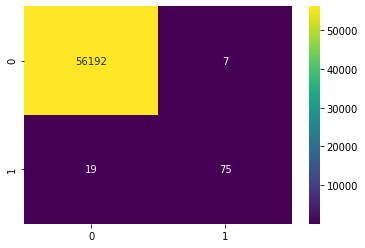

In [7]:
# confusion matrix
sns.heatmap(confusion_matrix(test_y, y_pred),annot=True,fmt='d',cmap='viridis')
plt.show()

In [8]:
# precision score
precision = precision_score(test_y, y_pred)
# recall score
recall = recall_score(test_y, y_pred)
# calculate f1 score and auc
f1 = f1_score(test_y, y_pred)
print('Precision Score=%.3f\nRecall Score=%.3f\nF1-score=%.3f' % (precision,recall,f1))

Precision Score=0.915
Recall Score=0.798
F1-score=0.852


In [9]:
# predicted probabilty
y_pred_proba = classifier.predict_proba(test_x)[:,1]

In [10]:
## Precison-Recall Curve
SVM_precision,SVM_recall,_ = precision_recall_curve(test_y,y_pred_proba)

In [11]:
# Compute area the curve of Precision Recall Curve
prc_auc = auc(SVM_recall,SVM_precision)
print ("AUC : %.3f" % prc_auc)

AUC : 0.854


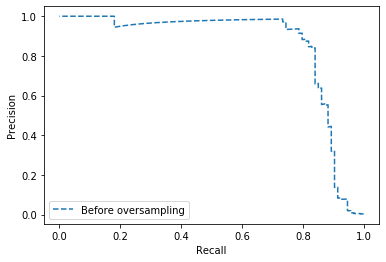

In [12]:
# plot precision recall curve
plt.plot(SVM_recall,SVM_precision,linestyle='--',label='Before oversampling')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [25]:
#### oversampling on training data
sm = SMOTE(sampling_strategy=0.2,random_state=0)

In [26]:
steps = [('o',sm)]
pipeline = Pipeline(steps=steps)

In [27]:
train_x_resample,train_y_resample = sm.fit_resample(train_x,train_y) 

In [28]:
counter = Counter(train_y_resample)
counter

Counter({0: 224770, 1: 44954})

In [29]:
classifier.fit(train_x_resample, train_y_resample)

SVC(C=10, gamma=0.001, probability=True, random_state=0)

In [30]:
y_pred_resample = classifier.predict(test_x)

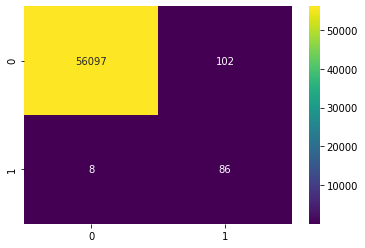

In [37]:
# confusion matrix
sns.heatmap(confusion_matrix(test_y, y_pred_resample),annot=True,fmt='d',cmap='viridis')
plt.show()

In [32]:
# precision score
precision = precision_score(test_y, y_pred_resample)
# recall score
recall = recall_score(test_y, y_pred_resample)
# calculate f1 score and auc
f1 = f1_score(test_y, y_pred_resample)
print('Precision Score=%.3f\nRecall Score=%.3f\nF1-score=%.3f' % (precision,recall,f1))

Precision Score=0.457
Recall Score=0.915
F1-score=0.610


In [33]:
# predicted probabilty
y_pred_proba_resample = classifier.predict_proba(test_x)[:,1]

In [34]:
#Precision Recall Curve
SVM_precision_resample,SVM_recall_resample,thresholds = precision_recall_curve(test_y,y_pred_proba_resample)

In [35]:
# Compute area the curve of Precision Recall Curve
prc_auc_resample = auc(SVM_recall_resample,SVM_precision_resample)
print ("Area under the PRC curve : %f" % prc_auc_resample)

Area under the PRC curve : 0.807399


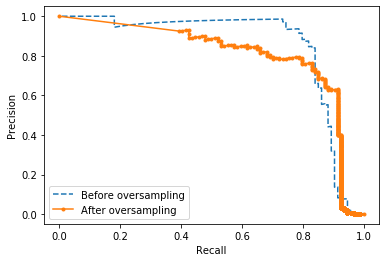

In [36]:
# plot
plt.plot(SVM_recall,SVM_precision,linestyle='--',label='Before oversampling')
plt.plot(SVM_recall_resample,SVM_precision_resample,marker='.',label='After oversampling')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()